<a href="https://colab.research.google.com/github/wleinemann5/tr-marketplace/blob/main/gp_ffe_inland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [ ]:
!pip install setuptools==64.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [ ]:
!pip install git+https://github.com/pymc-labs/CausalPy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pymc-labs/CausalPy.git to /tmp/pip-req-build-9mytjg_6
  Running command git clone --filter=blob:none --quiet https://github.com/pymc-labs/CausalPy.git /tmp/pip-req-build-9mytjg_6
  Resolved https://github.com/pymc-labs/CausalPy.git to commit 09958f784d0c954df8f4f2512bb39471190a0f48
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.1/706.1 KB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.1 MB/s eta 0:00:00
  Created wh

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#import causalpy as cp

# Import and process data
df = pd.read_csv('gdrive/My Drive/gp_ffe_2023.csv',thousands=',')

#df["date"] = pd.to_datetime(df["date"])
#df.set_index("date", inplace=True)
#df = df.iloc[df.index > "2009", :]

# specify date of the Brexit vote announcement
#treatment_time = pd.to_datetime("2022 May 10")

In [ ]:
df.head(10)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Aruba,Australia,...,United Arab Emirates,United Kingdom,United States,Unknown,Uruguay,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2021-01-01,159.25,NaN,NaN,NaN,478.615385,-1755.250000,-466.285714,NaN,374.166667,...,101.682051,-287.869200,-27.475523,NaN,NaN,NaN,11.817007,0.0,NaN,NaN
1,2021-02-01,NaN,-134.0,0.0,NaN,279.988889,NaN,-134.625000,NaN,278.034483,...,104.923211,-104.186674,158.298324,NaN,NaN,NaN,-2.911493,NaN,NaN,NaN
2,2021-03-01,-11006.00,NaN,NaN,NaN,409.818565,NaN,275.000000,128.0,449.508772,...,62.381317,-161.328373,21.615632,-54.0,NaN,130.000000,-8.410552,NaN,NaN,NaN
3,2021-04-01,NaN,NaN,NaN,NaN,277.755844,436.428571,-205.000000,NaN,-724.827586,...,161.042895,-108.503539,40.759655,NaN,-61.666667,-56.500000,33.090909,NaN,NaN,NaN
4,2021-05-01,NaN,NaN,NaN,786.0,204.710594,1377.125000,382.000000,211.0,-50.818182,...,73.446565,41.372870,14.389084,169.0,478.800000,1607.000000,17.898402,NaN,NaN,NaN
5,2021-06-01,NaN,-133.0,7.0,-139.0,240.384615,-1415.000000,55.000000,NaN,-198.800000,...,34.697830,-160.838051,-11.963184,0.0,165.615385,-126.222222,4.568214,NaN,NaN,NaN
6,2021-07-01,35255.00,NaN,0.0,NaN,231.828767,1643.666667,NaN,NaN,498.086956,...,79.441113,-101.871118,8.437744,-691.0,NaN,151.363636,11.630112,NaN,NaN,NaN
7,2021-08-01,NaN,NaN,NaN,89.0,154.617647,NaN,259.000000,NaN,56.000000,...,59.434211,-129.583989,11.033763,NaN,-2120.500000,97.375000,4.438095,NaN,NaN,NaN
8,2021-09-01,NaN,NaN,NaN,NaN,211.787194,NaN,NaN,NaN,-609.076923,...,19.386667,-34.441067,-72.578909,NaN,NaN,-14.666667,12.688000,NaN,NaN,NaN
9,2021-10-01,NaN,NaN,NaN,NaN,157.615721,NaN,134.000000,NaN,1032.760000,...,76.856905,-103.753955,70.901708,2.0,-158.066667,269.000000,33.183099,NaN,NaN,NaN


In [ ]:
df_m = df.dropna(axis=1)

In [ ]:
df_m.head(5)

,date,Angola,Australia,Austria,Bahrain,Bangladesh,Belgium,Botswana,Brazil,Bulgaria,...,Tanzania,Thailand,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Vietnam
0,2021-01-01,478.615385,374.166667,57.528986,107.952381,642.613861,55.102481,888.897059,125.317518,150.813953,...,2010.222222,88.120547,-14.303030,66.613662,55.080925,21.972407,101.682051,-287.869200,-27.475523,11.817007
1,2021-02-01,279.988889,278.034483,-110.180904,164.500000,23.959184,-51.222567,-454.939759,216.664093,94.345992,...,2044.409091,72.672055,-156.734694,51.827704,559.058140,45.921366,104.923211,-104.186674,158.298324,-2.911493
2,2021-03-01,409.818565,449.508772,98.075710,48.765957,236.731801,-32.248898,1585.278689,-208.843575,189.738019,...,241.548387,83.069055,87.000000,84.542992,95.101796,125.340495,62.381317,-161.328373,21.615632,-8.410552
3,2021-04-01,277.755844,-724.827586,212.578778,140.745098,118.355330,14.499629,266.032609,299.731214,90.412245,...,-615.333333,75.542336,70.300000,26.489183,35.783626,69.980380,161.042895,-108.503539,40.759655,33.090909
4,2021-05-01,204.710594,-50.818182,-87.880150,-50.450000,701.610738,30.139731,761.018519,-527.233236,94.272189,...,-2046.692308,83.269088,-82.937500,115.919384,1518.805882,33.902089,73.446565,41.372870,14.389084,17.898402


In [ ]:
df_m["date"] = pd.to_datetime(df_m["date"])
df_m.set_index("date", inplace=True)

<ipython-input-7-74407dad3d1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m["date"] = pd.to_datetime(df_m["date"])


In [ ]:
treatment_time = pd.to_datetime("2022 Apr 30")




In [ ]:
pre_intervention_data = df_m.loc[df_m.index < treatment_time, :]

corr = pre_intervention_data.corr()

In [ ]:
corr[corr['United States'] > .25]

,Angola,Australia,Austria,Bahrain,Bangladesh,Belgium,Botswana,Brazil,Bulgaria,Burkina Faso,...,Tanzania,Thailand,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Vietnam
Australia,0.022604,1.000000,-0.377352,0.282351,0.432489,-0.263577,0.016998,0.244068,0.172093,-0.242697,...,-0.012362,-0.447729,-0.058888,0.120316,0.132604,0.145935,-0.041337,-0.129319,0.351515,-0.323176
Bangladesh,0.084535,0.432489,-0.711928,0.006827,1.000000,0.097735,0.353458,0.032668,0.319384,-0.024950,...,-0.301555,-0.011187,-0.028597,0.132529,0.070885,0.023860,0.267598,-0.186499,0.452965,0.027457
Chile,-0.192622,-0.021464,-0.152689,0.120981,0.247530,-0.257053,-0.004562,-0.320915,0.314789,-0.261322,...,-0.107827,0.089693,-0.100245,0.282708,0.680600,0.065381,-0.333542,0.252121,0.309437,0.127997
Georgia,0.222494,0.197453,-0.428724,-0.061371,0.541270,-0.118719,0.381360,-0.159477,0.481772,-0.038511,...,-0.089741,0.323666,0.250657,0.288221,0.124013,-0.074215,-0.052084,-0.069629,0.254122,-0.248023
Hungary,-0.017674,0.328125,-0.268012,0.124881,0.355755,-0.080498,-0.076888,-0.515543,0.406288,-0.355322,...,0.044479,-0.273451,-0.075692,-0.114341,0.344288,0.244114,-0.092789,0.125177,0.619481,-0.095552
India,-0.240463,0.315764,-0.327372,0.077864,0.156276,0.077806,0.312711,0.435135,-0.520110,0.039914,...,-0.336271,-0.087034,0.229703,0.391300,-0.292008,-0.284094,0.082419,0.189649,0.286123,0.124024
Ireland,0.245515,-0.194281,-0.021651,-0.112807,0.235252,0.336659,0.263751,-0.629430,0.286235,-0.050704,...,0.346522,-0.018950,0.111591,0.098287,-0.065492,-0.210749,0.025576,0.016674,0.263231,0.160706
"Korea, South",0.051175,0.148019,-0.527753,0.166186,0.168646,0.117942,-0.250856,-0.142275,-0.082037,-0.129502,...,0.457952,0.098635,-0.027493,-0.175783,-0.179664,0.185316,0.306594,-0.333832,0.561829,-0.013896
Kuwait,0.137138,-0.041747,-0.182132,0.007454,0.140712,-0.188127,0.112576,-0.063535,-0.113511,-0.122883,...,0.122570,0.274767,-0.231042,0.077893,-0.119091,-0.022442,0.158555,0.019298,0.445386,-0.065676
Latvia,-0.538126,0.245551,-0.080595,0.035026,-0.300410,-0.093605,-0.037720,-0.085147,-0.148362,-0.393060,...,-0.012076,-0.330831,-0.180006,0.328477,0.259548,0.221883,-0.748628,0.234761,0.282183,-0.143932


In [ ]:
cols = list(corr[corr['United States'] > .25].index)

In [ ]:
cols

['Australia',
 'Bangladesh',
 'Chile',
 'Georgia',
 'Hungary',
 'India',
 'Ireland',
 'Korea, South',
 'Kuwait',
 'Latvia',
 'Lithuania',
 'Malaysia',
 'Niger',
 'Oman',
 'Tunisia',
 'United States']

In [ ]:
df_m = df_m[cols]

In [ ]:
df_m = df_m.rename(columns={'United States':'US',
                            'Korea, South':'SK'})

In [ ]:
target_country = 'US'

In [ ]:
poplist = list(df_m.columns)
poplist.remove(target_country)

In [ ]:
tmp_str = ""
for p in poplist:
  tmp_str = tmp_str + " + " + p
print(tmp_str)

 + Australia + Bangladesh + Chile + Georgia + Hungary + India + Ireland + SK + Kuwait + Latvia + Lithuania + Malaysia + Niger + Oman + Tunisia


In [ ]:
formula = "" + target_country + " ~ 0" + tmp_str
print(formula)

US ~ 0 + Australia + Bangladesh + Chile + Georgia + Hungary + India + Ireland + SK + Kuwait + Latvia + Lithuania + Malaysia + Niger + Oman + Tunisia


In [ ]:
sample_kwargs = {"target_accept": 0.95}

In [ ]:
result = cp.pymc_experiments.SyntheticControl(
    df_m,
    treatment_time,
    formula=formula,
    model=cp.pymc_models.WeightedSumFitter(sample_kwargs=sample_kwargs),
    #prediction_model=cp.pymc_models.WeightedSumFitter(sample_kwargs=sample_kwargs),
)

In [ ]:
az.summary(result.idata, var_names=["~mu"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[Intercept],0.522,0.037,0.453,0.589,0.001,0.001,1116.0,1506.0,1.0
beta[Australia],0.013,0.007,0.001,0.024,0.000,0.000,660.0,558.0,1.0
beta[Bangladesh],0.006,0.003,0.000,0.011,0.000,0.000,758.0,688.0,1.0
beta[Chile],0.010,0.002,0.006,0.014,0.000,0.000,1346.0,1170.0,1.0
beta[Georgia],0.003,0.003,0.000,0.008,0.000,0.000,1093.0,755.0,1.0
beta[Hungary],0.045,0.027,0.000,0.091,0.001,0.001,885.0,725.0,1.0
beta[India],0.158,0.022,0.116,0.198,0.001,0.000,1685.0,1080.0,1.0
beta[Ireland],0.004,0.004,0.000,0.010,0.000,0.000,851.0,735.0,1.0
beta[SK],0.039,0.006,0.027,0.051,0.000,0.000,1551.0,1316.0,1.0
beta[Kuwait],0.010,0.006,0.000,0.021,0.000,0.000,580.0,472.0,1.0


(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.,
        19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

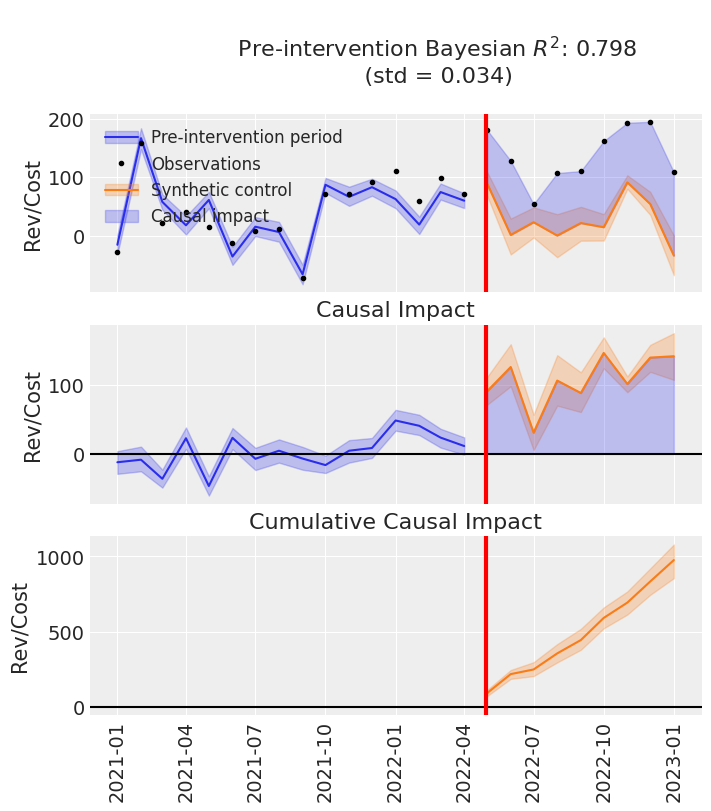

In [ ]:
az.style.use("arviz-darkgrid")

#plt.subplots(figsize=(9,6))
fig, ax = result.plot(plot_predictors=False)

#fig, ax = result.plot(plot_predictors=False)


for i in [0, 1, 2]:
    ax[i].set(ylabel="GP/FFE")

plt.xticks(rotation=90)

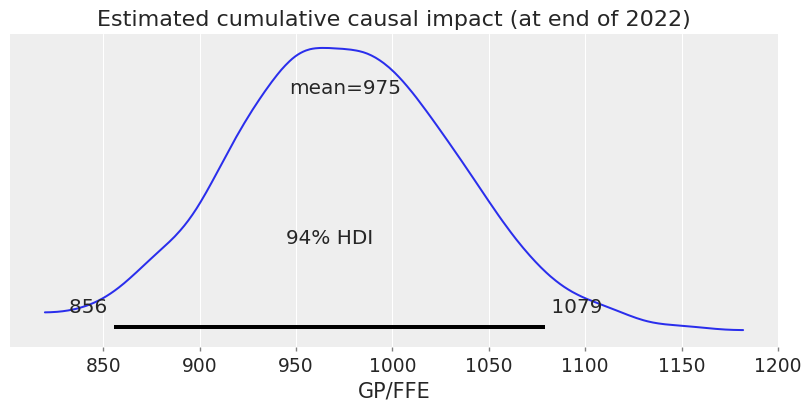

In [ ]:
index = result.post_impact_cumulative.obs_ind.max()

last_cumulative_estimate = result.post_impact_cumulative.sel({"obs_ind":index})

ax = az.plot_posterior(last_cumulative_estimate, figsize=(8, 4))
ax.set(
    title="Estimated cumulative causal impact (at end of 2022)",
    xlabel="GP/FFE",
);

In [ ]:
az.summary(result.post_impact.mean("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,108.369,6.579,95.057,119.884,0.192,0.136,1179.0,1392.0,1.0


In [ ]:
df_m.iloc[df_m.index > treatment_time,:]['US'].mean()

137.65398270111112

In [ ]:
treatment_time = pd.to_datetime("2022 May 11")

In [ ]:
result = cp.pymc_experiments.SyntheticControl(
    df_m,
    treatment_time,
    formula=formula,
    model=cp.pymc_models.WeightedSumFitter(sample_kwargs=sample_kwargs),
    #prediction_model=cp.pymc_models.WeightedSumFitter(sample_kwargs=sample_kwargs),
)

(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.,
        19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

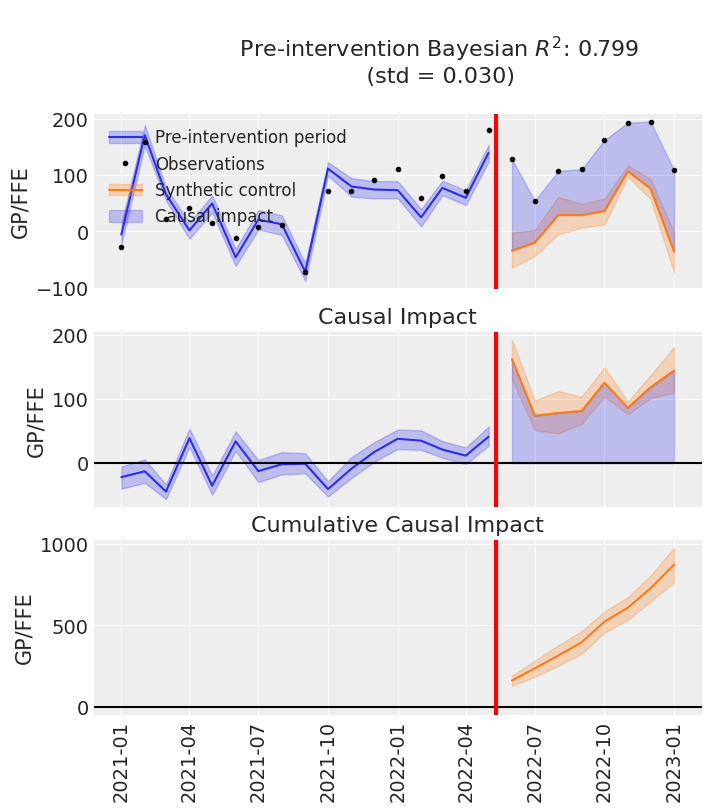

In [ ]:
az.style.use("arviz-darkgrid")

#plt.subplots(figsize=(9,6))
fig, ax = result.plot(plot_predictors=False)

#fig, ax = result.plot(plot_predictors=False)


for i in [0, 1, 2]:
    ax[i].set(ylabel="GP/FFE")

plt.xticks(rotation=90)

(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.,
        19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

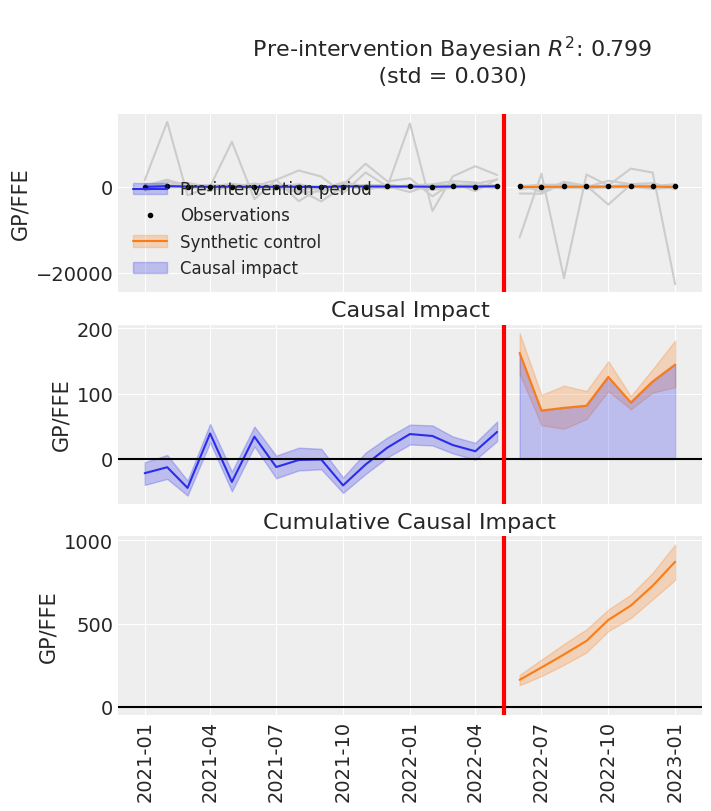

In [ ]:
az.style.use("arviz-darkgrid")

#plt.subplots(figsize=(9,6))
fig, ax = result.plot(plot_predictors=True)

#fig, ax = result.plot(plot_predictors=False)


for i in [0, 1, 2]:
    ax[i].set(ylabel="GP/FFE")

plt.xticks(rotation=90)

In [ ]:
df_m

,Australia,Bangladesh,Chile,Georgia,Hungary,India,Ireland,SK,Kuwait,Latvia,Lithuania,Malaysia,Niger,Oman,Tunisia,US
date,,,,,,,,,,,,,,,,
2021-01-01,374.166667,642.613861,205.672131,158.704545,-76.888992,20.032777,-79.250000,261.760563,-319.769231,-572.242424,-286.047619,-844.625000,1519.444444,298.821429,-14.303030,-27.475523
2021-02-01,278.034483,23.959184,1120.966102,212.058823,280.215455,154.531327,177.238095,1649.853659,1527.666667,16.495413,188.606061,139.400000,15033.500000,173.666667,-156.734694,158.298324
2021-03-01,449.508772,236.731801,304.951613,879.538462,225.450524,144.209595,35.407960,-141.795455,429.937500,-86.743697,108.125000,464.666667,-1969.631579,-53.500000,87.000000,21.615632
2021-04-01,-724.827586,118.355330,397.180723,-22.000000,94.888743,21.647293,12.572414,61.093750,266.000000,-677.857143,202.134328,-41.636364,56.800000,-60.000000,70.300000,40.759655
2021-05-01,-50.818182,701.610738,136.107143,209.000000,117.421598,245.812444,17.105769,-185.548387,9.000000,-77.329545,76.264706,60.138462,10427.600000,35.000000,-82.937500,14.389084
2021-06-01,-198.800000,157.631579,93.571429,48.733333,59.519303,35.303957,129.525000,-22.941176,762.090909,-124.859375,-197.621622,-28.263158,-2859.909091,171.250000,-407.740741,-11.963184
2021-07-01,498.086956,329.800000,1610.533333,18.434783,179.927907,73.152151,-332.613636,121.270833,147.562500,39.389610,62.938462,33.928571,1627.923077,-48.500000,-572.166667,8.437744
2021-08-01,56.000000,-684.645161,-3309.818182,64.375000,-5.649390,188.569631,150.984615,609.829545,-934.000000,0.283019,102.250000,145.200000,3778.888889,-1279.000000,-29.117647,11.033763
2021-09-01,-609.076923,-3372.000000,-238.895833,-392.250000,-68.011628,48.592965,-317.976744,-412.463917,3.363636,132.697674,-55.300000,-542.600000,2378.500000,-1047.000000,-84.857143,-72.578909


(-100.0, 200.0)

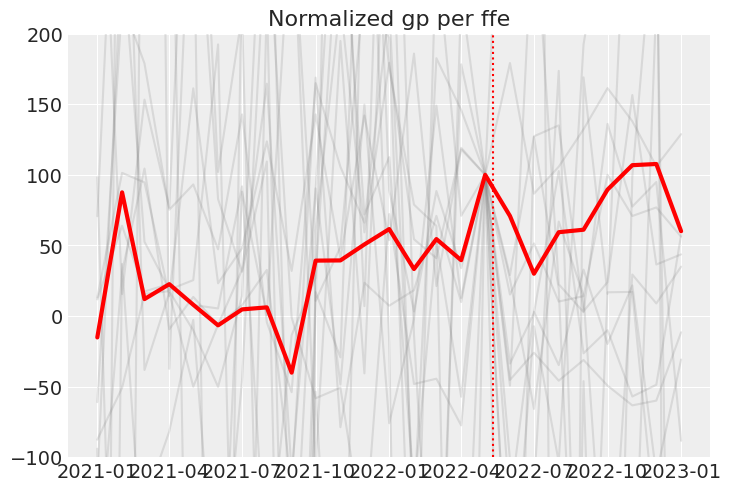

In [ ]:
gdp_at_intervention = df_m.loc[pd.to_datetime("2022 May 01"), :]
df_normalised = (df_m / gdp_at_intervention) * 100.0

#poplist2 = poplist.remove('Australia')
# plot
fig, ax = plt.subplots()
for col in poplist:
    ax.plot(df_normalised.index, df_normalised[col], color="grey", alpha=0.2)

ax.plot(df_normalised.index, df_normalised[target_country], color="red", lw=3)
# ax = df_normalised.plot(legend=False)

# formatting
ax.set(title="Normalized gp per ffe")
ax.axvline(x=treatment_time, color="r", ls=":");
plt.ylim((-100,200))

In [ ]:
df

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Aruba,Australia,...,United Arab Emirates,United Kingdom,United States,Unknown,Uruguay,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2021-01-01,159.25,NaN,NaN,NaN,478.615385,-1755.250000,-466.285714,NaN,374.166667,...,101.682051,-287.869200,-27.475523,NaN,NaN,NaN,11.817007,0.0,NaN,NaN
1,2021-02-01,NaN,-134.00,0.00,NaN,279.988889,NaN,-134.625000,NaN,278.034483,...,104.923211,-104.186674,158.298324,NaN,NaN,NaN,-2.911493,NaN,NaN,NaN
2,2021-03-01,-11006.00,NaN,NaN,NaN,409.818565,NaN,275.000000,128.000000,449.508772,...,62.381317,-161.328373,21.615632,-54.0,NaN,130.000000,-8.410552,NaN,NaN,NaN
3,2021-04-01,NaN,NaN,NaN,NaN,277.755844,436.428571,-205.000000,NaN,-724.827586,...,161.042895,-108.503539,40.759655,NaN,-61.666667,-56.500000,33.090909,NaN,NaN,NaN
4,2021-05-01,NaN,NaN,NaN,786.0,204.710594,1377.125000,382.000000,211.000000,-50.818182,...,73.446565,41.372870,14.389084,169.0,478.800000,1607.000000,17.898402,NaN,NaN,NaN
5,2021-06-01,NaN,-133.00,7.00,-139.0,240.384615,-1415.000000,55.000000,NaN,-198.800000,...,34.697830,-160.838051,-11.963184,0.0,165.615385,-126.222222,4.568214,NaN,NaN,NaN
6,2021-07-01,35255.00,NaN,0.00,NaN,231.828767,1643.666667,NaN,NaN,498.086956,...,79.441113,-101.871118,8.437744,-691.0,NaN,151.363636,11.630112,NaN,NaN,NaN
7,2021-08-01,NaN,NaN,NaN,89.0,154.617647,NaN,259.000000,NaN,56.000000,...,59.434211,-129.583989,11.033763,NaN,-2120.500000,97.375000,4.438095,NaN,NaN,NaN
8,2021-09-01,NaN,NaN,NaN,NaN,211.787194,NaN,NaN,NaN,-609.076923,...,19.386667,-34.441067,-72.578909,NaN,NaN,-14.666667,12.688000,NaN,NaN,NaN
9,2021-10-01,NaN,NaN,NaN,NaN,157.615721,NaN,134.000000,NaN,1032.760000,...,76.856905,-103.753955,70.901708,2.0,-158.066667,269.000000,33.183099,NaN,NaN,NaN


In [ ]:
df.plot()

In [ ]:
result = cp.pymc_experiments.SyntheticControl(
    df_m,
    treatment_time,
    formula=formula,
    model=cp.pymc_models.WeightedSumFitter(sample_kwargs=sample_kwargs),
    #prediction_model=cp.pymc_models.WeightedSumFitter(sample_kwargs=sample_kwargs),
)

(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.,
        19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

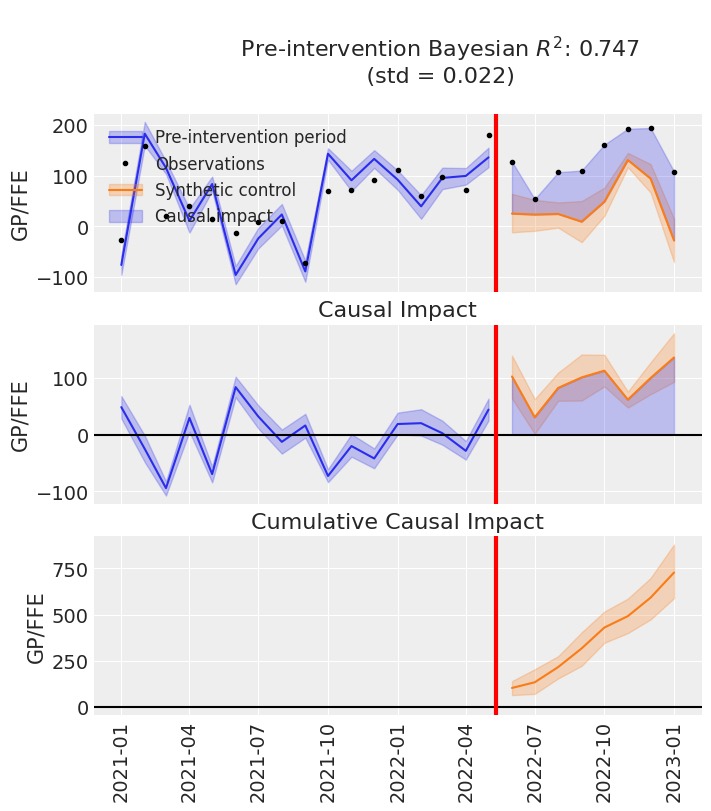

In [ ]:
az.style.use("arviz-darkgrid")

#plt.subplots(figsize=(9,6))
#fig, ax = result.plot(plot_predictors=True)

fig, ax = result.plot(plot_predictors=False)


for i in [0, 1, 2]:
    ax[i].set(ylabel="GP/FFE")

plt.xticks(rotation=90)

In [ ]:
df_m.head()

,Australia,Bangladesh,Chile,Georgia,Hungary,India,Ireland,SK,Kuwait,Latvia,Lithuania,Malaysia,Niger,Oman,Tunisia,US
date,,,,,,,,,,,,,,,,
2021-01-01,374.166667,642.613861,205.672131,158.704545,-76.888992,20.032777,-79.250000,261.760563,-319.769231,-572.242424,-286.047619,-844.625000,1519.444444,298.821429,-14.303030,-27.475523
2021-02-01,278.034483,23.959184,1120.966102,212.058823,280.215455,154.531327,177.238095,1649.853659,1527.666667,16.495413,188.606061,139.400000,15033.500000,173.666667,-156.734694,158.298324
2021-03-01,449.508772,236.731801,304.951613,879.538462,225.450524,144.209595,35.407960,-141.795455,429.937500,-86.743697,108.125000,464.666667,-1969.631579,-53.500000,87.000000,21.615632
2021-04-01,-724.827586,118.355330,397.180723,-22.000000,94.888743,21.647293,12.572414,61.093750,266.000000,-677.857143,202.134328,-41.636364,56.800000,-60.000000,70.300000,40.759655
2021-05-01,-50.818182,701.610738,136.107143,209.000000,117.421598,245.812444,17.105769,-185.548387,9.000000,-77.329545,76.264706,60.138462,10427.600000,35.000000,-82.937500,14.389084


In [ ]:
df_else = df_m.drop('US',axis=1)

In [ ]:
df_ex_us_median = df_else.median(axis=1)
df_ex_us_median.name = "Median Ex_US"

In [ ]:
df_us = df_m['US']

In [ ]:
df_comb = pd.merge(left=df_ex_us_median,
         right=df_us,
         how='left',
         left_index=True,
         right_index=True)

Text(0, 0.5, 'GP per FFE')

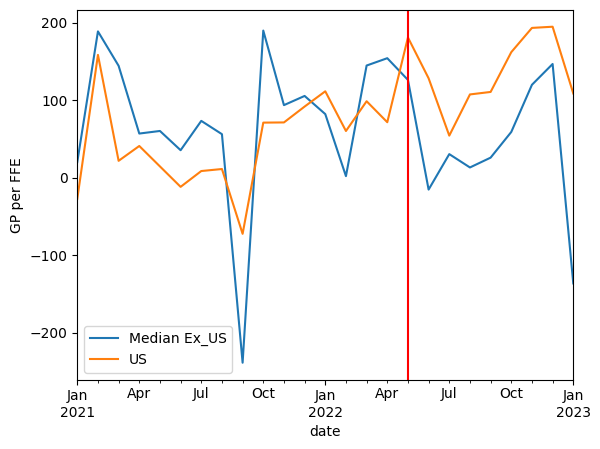

In [ ]:
df_comb.plot(kind='line')
plt.axvline('2022-05-11',color='r')
plt.ylabel('GP per FFE')

In [ ]:
df_else.columns

Index(['Australia', 'Bangladesh', 'Chile', 'Georgia', 'Hungary', 'India',
       'Ireland', 'SK', 'Kuwait', 'Latvia', 'Lithuania', 'Malaysia', 'Niger',
       'Oman', 'Tunisia'],
      dtype='object')

In [ ]:
df_comb.head(17)

,Median Ex_US,US
date,,
2021-01-01,20.032777,-27.475523
2021-02-01,188.606061,158.298324
2021-03-01,144.209595,21.615632
2021-04-01,56.800000,40.759655
2021-05-01,60.138462,14.389084
2021-06-01,35.303957,-11.963184
2021-07-01,73.152151,8.437744
2021-08-01,56.000000,11.033763
2021-09-01,-238.895833,-72.578909


In [ ]:
df_comb['norm_Ex_US'] = df_comb['Median Ex_US']/126.01
df_comb['norm_US'] = df_comb['US']/180.77

Text(0, 0.5, 'GP per FFE')

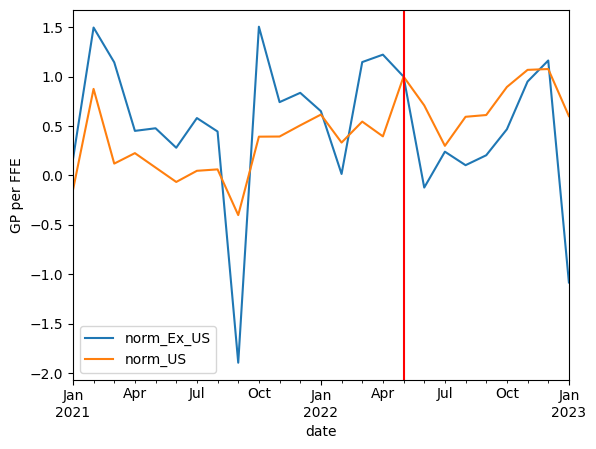

In [ ]:
df_comb.plot(y=['norm_Ex_US','norm_US'],kind='line')
plt.axvline('2022-05-11',color='r')
plt.ylabel('GP per FFE')

In [ ]:
df_comb

,Median Ex_US,US,norm_Ex_US,norm_US
date,,,,
2021-01-01,20.032777,-27.475523,0.158978,-0.151992
2021-02-01,188.606061,158.298324,1.496755,0.875689
2021-03-01,144.209595,21.615632,1.144430,0.119575
2021-04-01,56.800000,40.759655,0.450758,0.225478
2021-05-01,60.138462,14.389084,0.477252,0.079599
2021-06-01,35.303957,-11.963184,0.280168,-0.066179
2021-07-01,73.152151,8.437744,0.580527,0.046677
2021-08-01,56.000000,11.033763,0.444409,0.061038
2021-09-01,-238.895833,-72.578909,-1.895848,-0.401499
